## All Imports

In [1]:
import seaborn as sns
import pandas as pd
import folium
import numpy as np 
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import re
import os
import warnings
import plotly.express as px
import geopandas as gpd
warnings.filterwarnings('ignore')
%matplotlib inline

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def ensure_dir_exists(directory):
    """
    Create a directory if it doesn't exist
    """
    if not os.path.exists(directory):
        os.makedirs(directory)
        print(f"Created directory: {directory}")

def save_to_question_dir(filename, question_num, *args, **kwargs):
    """
    Save a file to the specified question directory, creating it if necessary
    """
    dir_name = f'q{question_num}'
    ensure_dir_exists(dir_name)
    filepath = os.path.join(dir_name, filename)
    plt.savefig(filepath, *args, **kwargs)
    print(f"Saved {filename} to {filepath}")

In [3]:
data = pd.read_csv('properties.csv', low_memory=False)

In [4]:
data['Carpet Area Unit'].value_counts(dropna=False)

Sq-ft     10056
NaN        2607
Sq-m         15
Acre          3
Sq-yrd        2
Marla         1
Ground        1
Name: Carpet Area Unit, dtype: int64

## All Columns (for reference)

In [5]:
for col in data.columns:
    print(f"Column '{col}': {data[col].dtype}")

Column 'ID': int64
Column 'Possession Status': object
Column 'Availability Starts From': object
Column 'Floor No': object
Column 'Commercial': object
Column 'Developer': object
Column 'Approved Authority Name': object
Column 'Units Available': float64
Column 'Price': float64
Column 'Price (English)': object
Column 'Flooring Type': object
Column 'Electricity Status': object
Column 'Maintenance Type': object
Column 'Maintenance Charges': float64
Column 'Booking Amount': float64
Column 'Landmark': object
Column 'Covered Area': float64
Column 'Project Name': object
Column 'sqft Price ': float64
Column 'Carpet Area': float64
Column 'Area Name': object
Column 'Property Uniqueness': object
Column 'Unit of Carpet Area': object
Column 'Society': object
Column 'Ownership Type': object
Column 'furnished Type': object
Column 'Bathroom': float64
Column 'Parking': object
Column 'Facing': object
Column 'Amenities Facing': object
Column 'Transaction Type': object
Column 'Floor Data': object
Column 'Ty

## Part 1

Overall Budget Distribution:
Medium     6270
Low        3197
High       3134
Unknown      84
Name: Budget_Category, dtype: int64


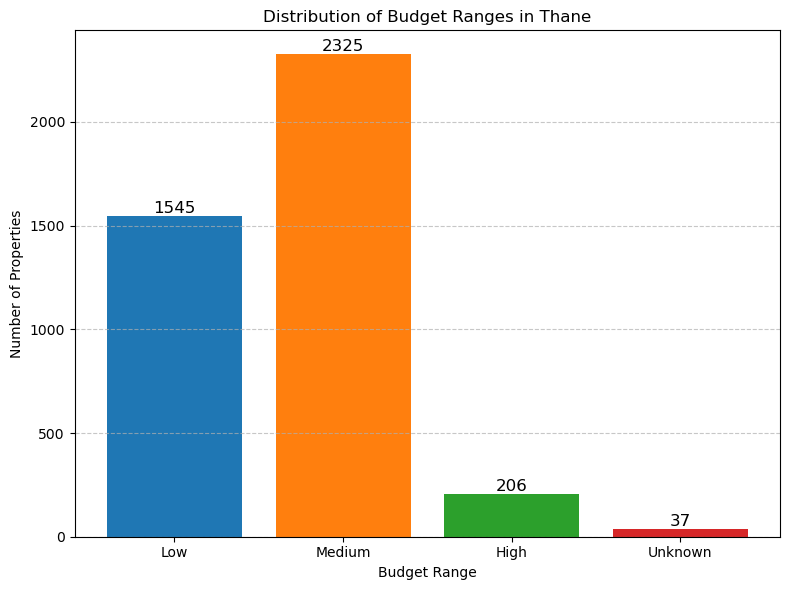

Saved bar_budget_thane.jpg to q1/bar_budget_thane.jpg


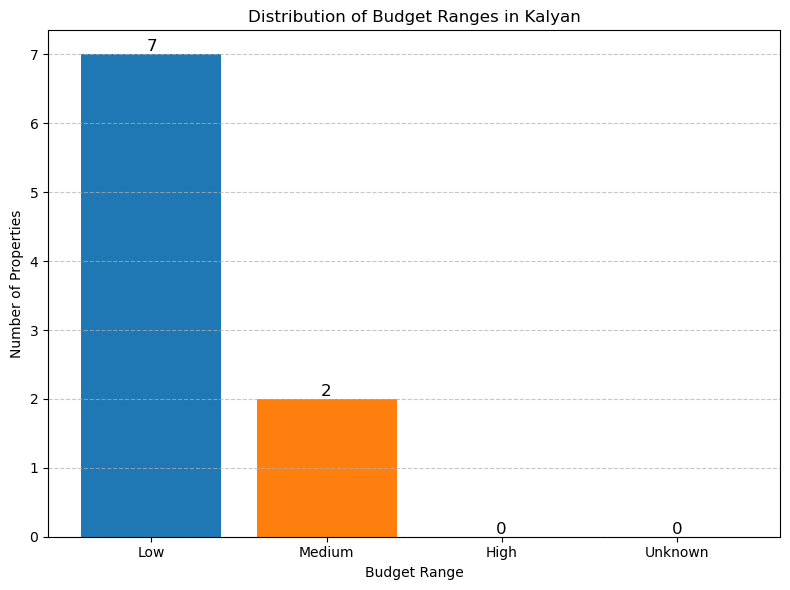

Saved bar_budget_kalyan.jpg to q1/bar_budget_kalyan.jpg


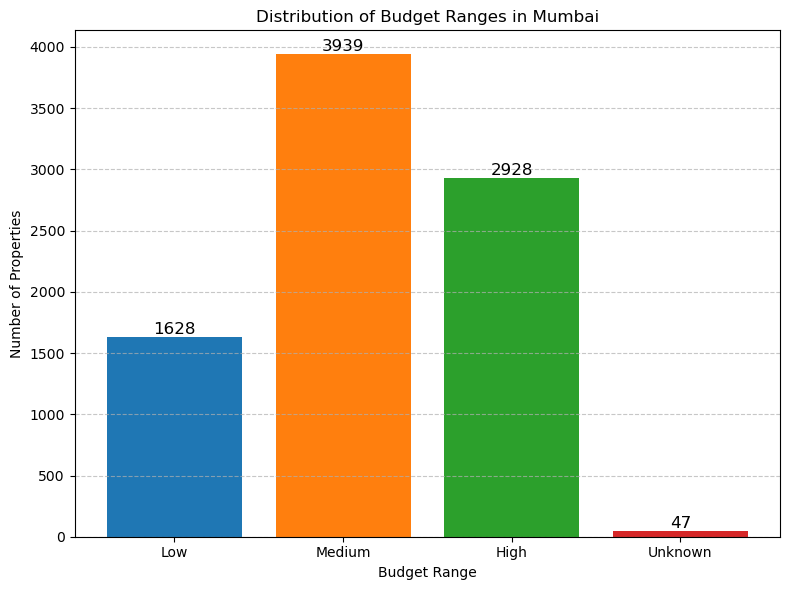

Saved bar_budget_mumbai.jpg to q1/bar_budget_mumbai.jpg


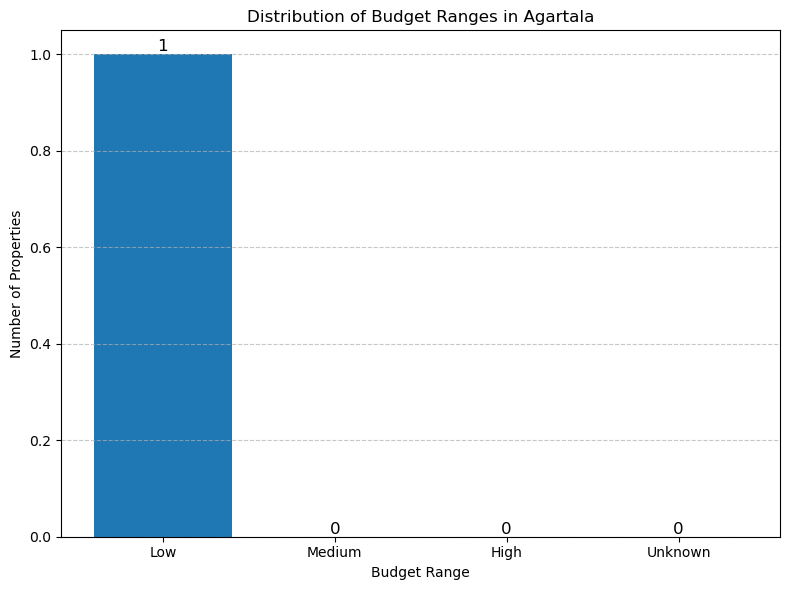

Saved bar_budget_agartala.jpg to q1/bar_budget_agartala.jpg


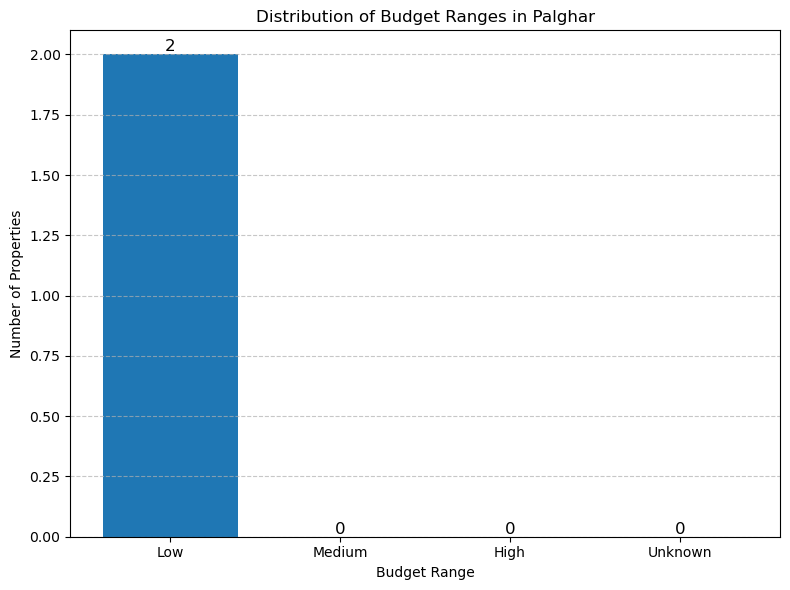

Saved bar_budget_palghar.jpg to q1/bar_budget_palghar.jpg


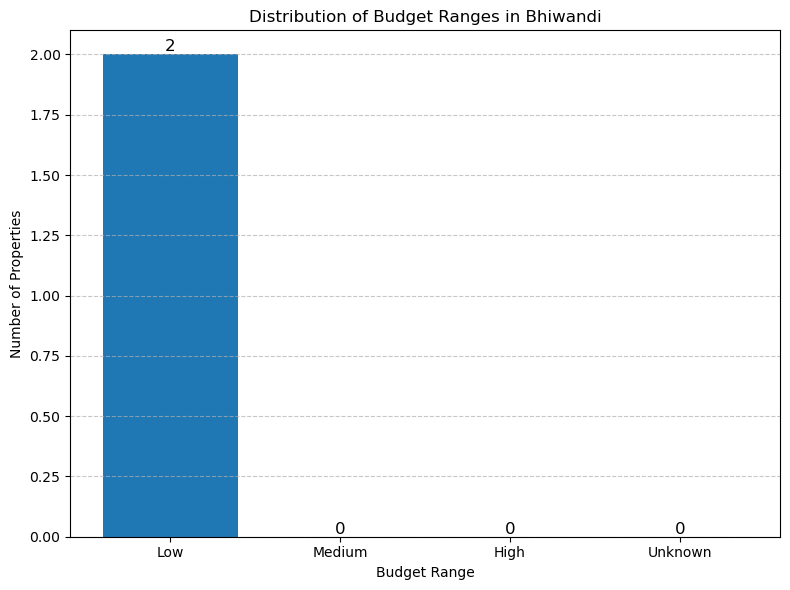

Saved bar_budget_bhiwandi.jpg to q1/bar_budget_bhiwandi.jpg


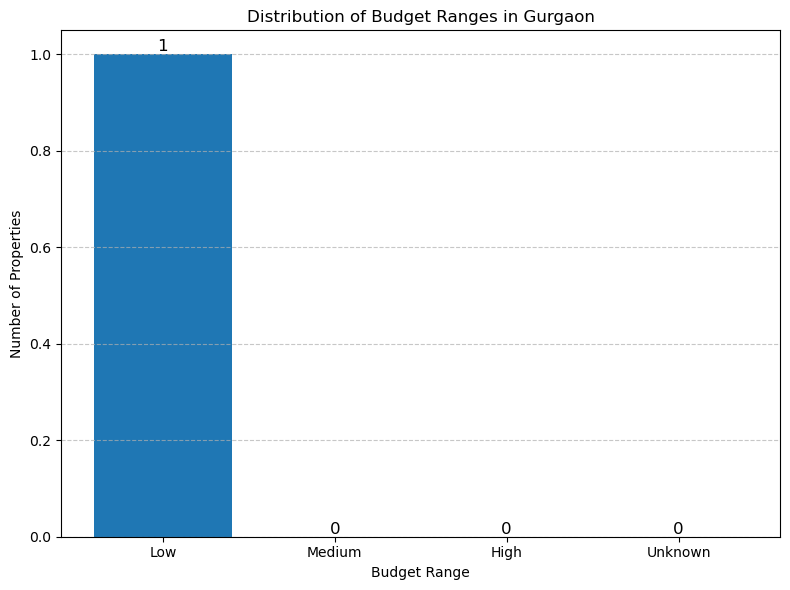

Saved bar_budget_gurgaon.jpg to q1/bar_budget_gurgaon.jpg


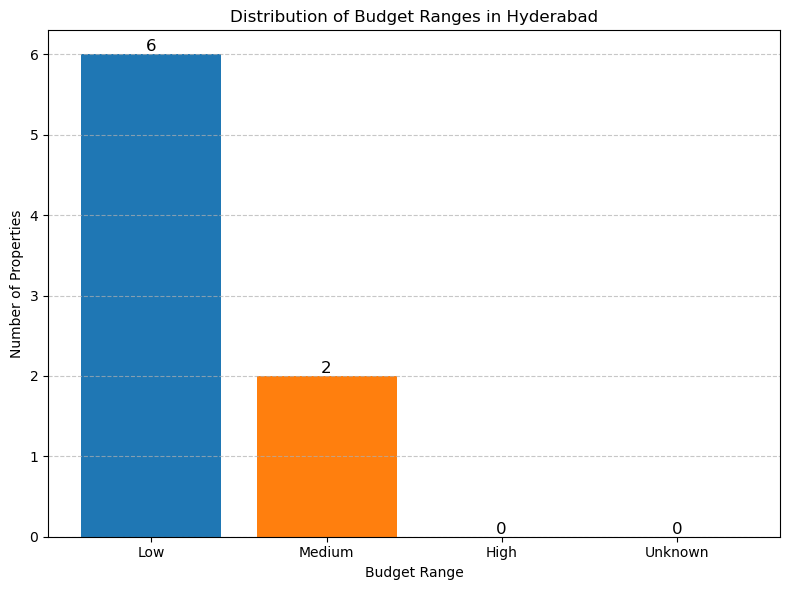

Saved bar_budget_hyderabad.jpg to q1/bar_budget_hyderabad.jpg


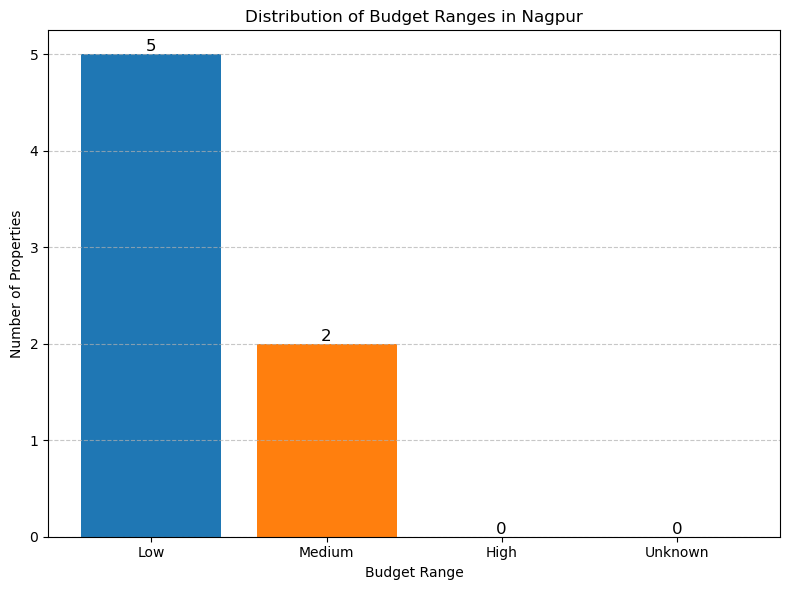

Saved bar_budget_nagpur.jpg to q1/bar_budget_nagpur.jpg


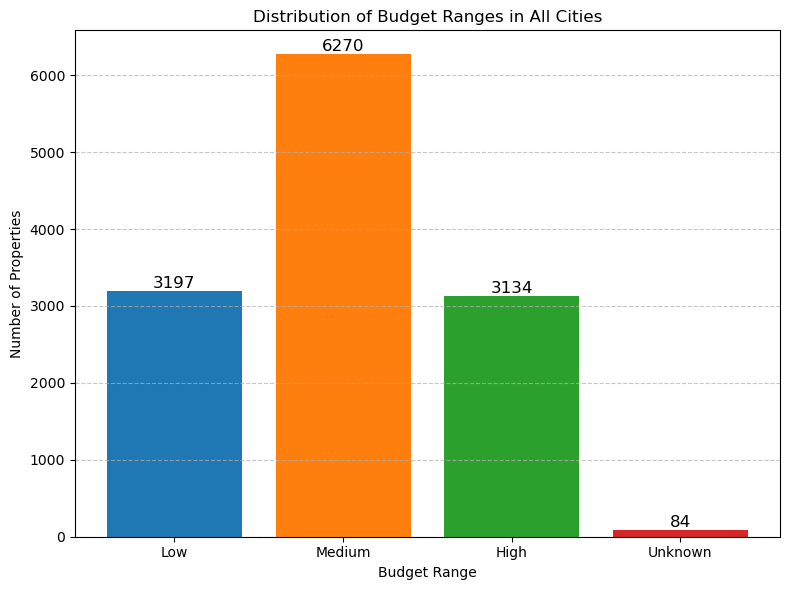

Saved bar_budget_all_cities.jpg to q1/bar_budget_all_cities.jpg


<Figure size 3000x2000 with 0 Axes>

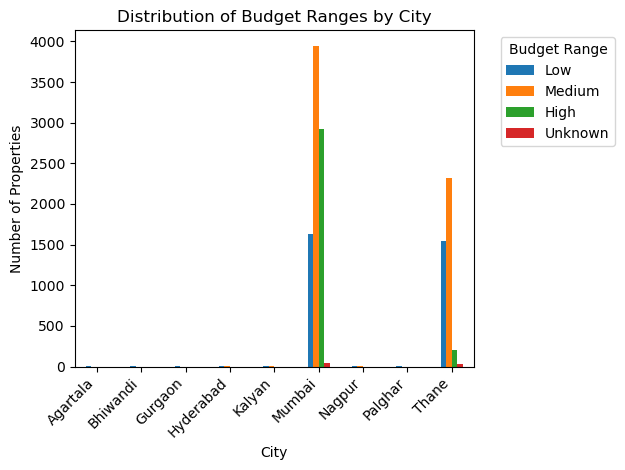

Saved grouped_vertical_bar_budget_by_city.jpg to q1/grouped_vertical_bar_budget_by_city.jpg


In [6]:
def categorize_price_percentile(price, percentile_values):
    """Categorize price into budget categories"""
    if pd.isnull(price):
        return "Unknown"
    elif price <= percentile_values.iloc[0]:
        return "Low"
    elif price <= percentile_values.iloc[1]:
        return "Medium"
    else:
        return "High"


def plot_city_budget(city_data, city_name, question_num):
    """Plot budget distribution for a city"""
    all_categories = ["Low", "Medium", "High", "Unknown"]
    budget_distribution = city_data["Budget_Category"].value_counts()
    budget_distribution = budget_distribution.reindex(all_categories, fill_value=0)

    plt.figure(figsize=(8, 6))
    bars = plt.bar(
        budget_distribution.index,
        budget_distribution.values,
        color=["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"],
    )
    plt.xlabel("Budget Range")
    plt.ylabel("Number of Properties")
    plt.title(f"Distribution of Budget Ranges in {city_name}")
    for bar in bars:
        yval = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            yval,
            int(yval),
            ha="center",
            va="bottom",
            color="black",
            fontsize=12,
        )
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()
    save_to_question_dir(
        f'bar_budget_{city_name.lower().replace(" ", "_")}.jpg', question_num
    )
    plt.close()


def analyze_budget_categories(data, question_num):
    """Analyze and visualize budget categories for all cities"""

    # Calculate price percentiles and categorize
    percentiles = [25, 75]
    percentile_values = data["Price"].quantile([p / 100 for p in percentiles])
    data["Budget_Category"] = data["Price"].apply(
        lambda x: categorize_price_percentile(x, percentile_values)
    )
    data["Price_Category"] = data[
        "Budget_Category"
    ]  # If you need this as a separate column

    budget_distribution = data["Budget_Category"].value_counts()
    print("Overall Budget Distribution:")
    print(budget_distribution)

    # Plot budget distribution for each city
    for city in data["City"].unique():
        city_data = data[data["City"] == city]
        plot_city_budget(city_data, city, question_num)

    # Plot budget distribution for all cities combined
    plot_city_budget(data, "All Cities", question_num)

    # Stacked bar plot for all cities
    city_budget_data = (
        data.groupby(["City", "Budget_Category"]).size().unstack(fill_value=0)
    )
    city_budget_data = city_budget_data.reindex(
        columns=["Low", "Medium", "High", "Unknown"]
    )

    plt.figure(figsize=(30, 20))
    city_budget_data.plot(kind="bar", stacked=False)
    plt.xlabel("City")
    plt.ylabel("Number of Properties")
    plt.title("Distribution of Budget Ranges by City")
    plt.legend(title="Budget Range", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()
    save_to_question_dir(
        "grouped_vertical_bar_budget_by_city.jpg", question_num, bbox_inches="tight"
    )
    plt.close()


analyze_budget_categories(data, 1)

## Part 2

## Part 3

Null values in each column:
City                      0
Unit of Carpet Area    1307
Carpet Area            2552
Carpet Area Unit       2607
Type of Property          0
Price                    84
dtype: int64
Saved property_type_distribution.png to q3/property_type_distribution.png


<Figure size 1200x600 with 0 Axes>

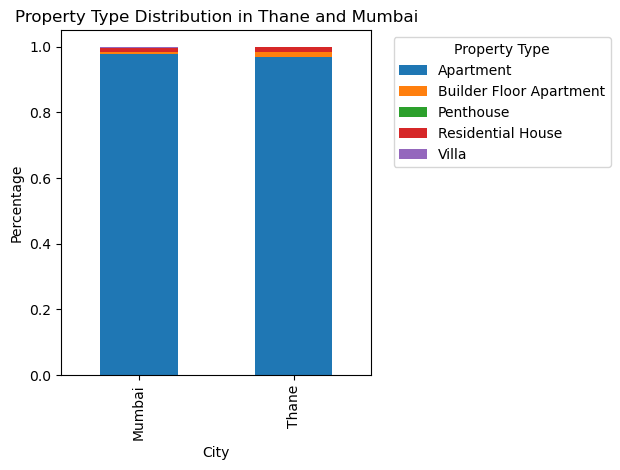

Saved carpet_area_distribution.png to q3/carpet_area_distribution.png


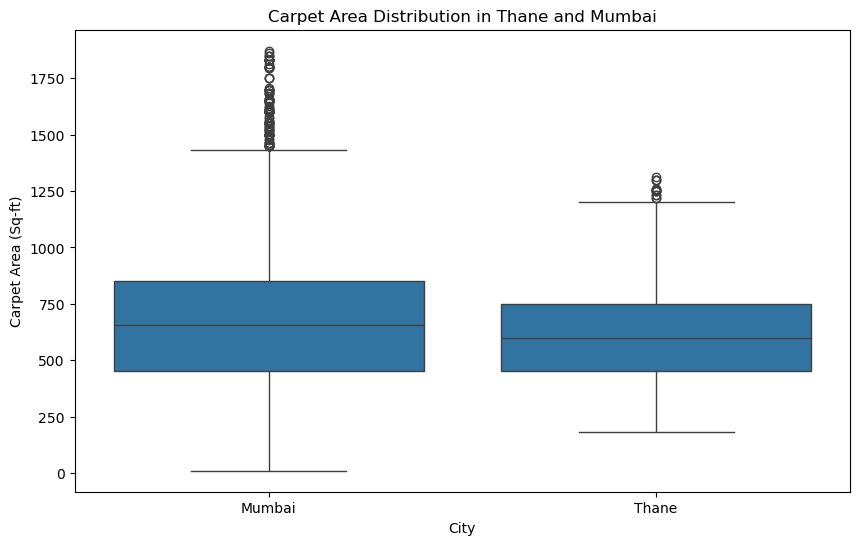

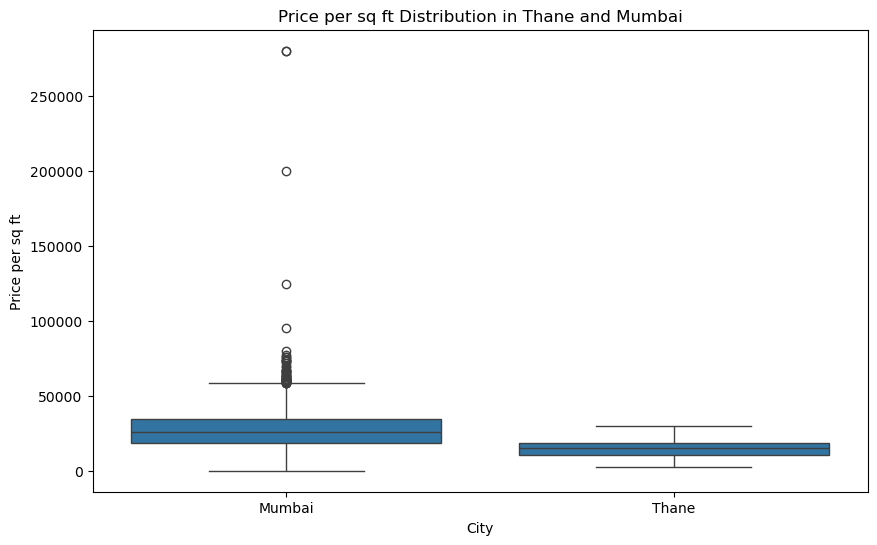

Saved price_distribution.png to q3/price_distribution.png


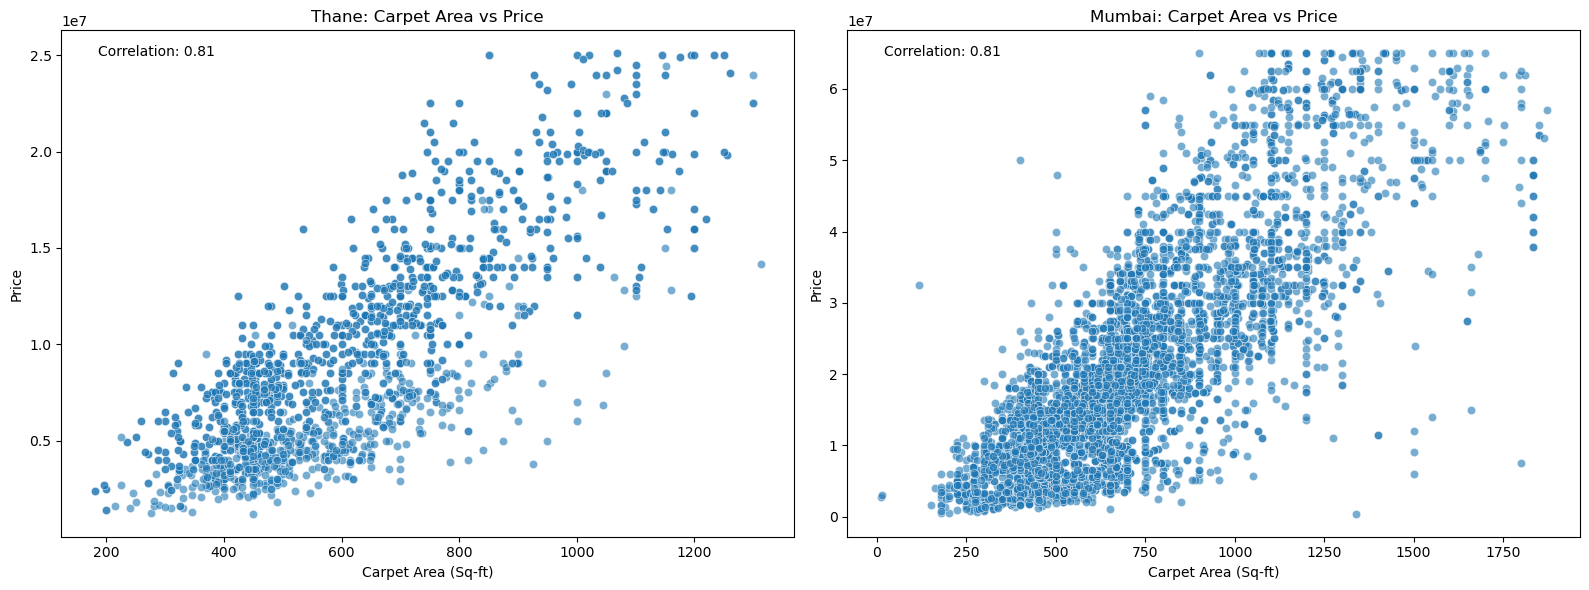

Saved carpet_area_vs_price.png to q3/carpet_area_vs_price.png


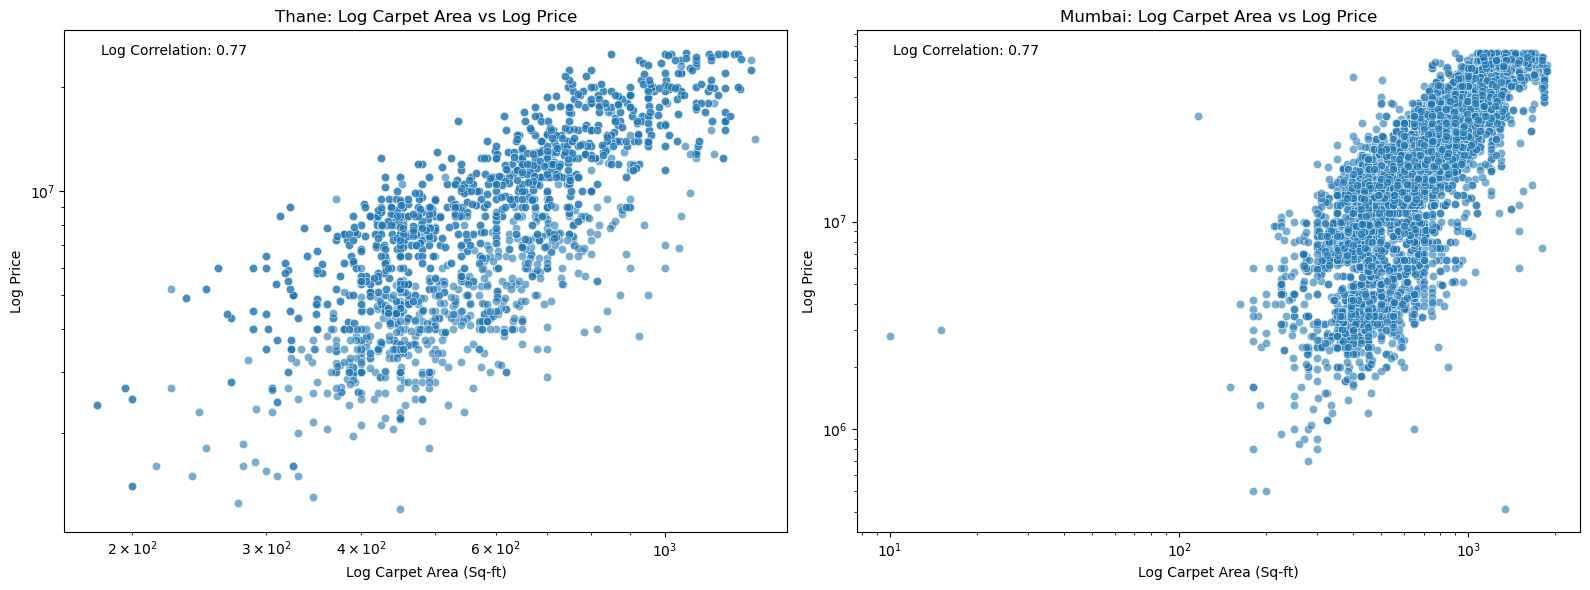

Saved carpet_area_vs_price_log.png to q3/carpet_area_vs_price_log.png


<Figure size 1200x600 with 0 Axes>

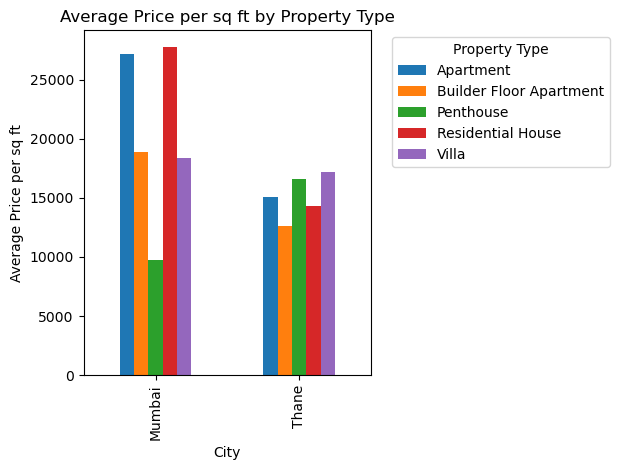

Saved avg_price_by_property_type.png to q3/avg_price_by_property_type.png


In [7]:
def convert_to_sqft(area, unit):
    """Convert the given area to square feet based on the unit"""
    if pd.isna(area) or pd.isna(unit):
        return None
    conversion_factors = {'Sq-ft': 1, 'Sq-m': 10.7639, 'Sq-yrd': 9}
    return area * conversion_factors.get(unit, 0)

def remove_outliers(df, columns):
    """Remove outliers using the IQR method"""
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        df = df[(df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 * IQR)]
    return df

def analyze_property_data(data, question_num):
    """Main function to analyze and visualize property data"""
    
    # Data Cleaning and Preparation
    carpet_area_df = data[['City', 'Unit of Carpet Area', 'Carpet Area', 'Carpet Area Unit', 'Type of Property', 'Price']].copy()
    
    print("Null values in each column:")
    print(carpet_area_df.isnull().sum())
    carpet_area_df_clean = carpet_area_df.dropna()        
    carpet_area_df_clean = carpet_area_df_clean[carpet_area_df_clean['Unit of Carpet Area'] == carpet_area_df_clean['Carpet Area Unit']]
    
    carpet_area_df_clean['Carpet Area (Sq-ft)'] = carpet_area_df_clean.apply(
        lambda row: convert_to_sqft(row['Carpet Area'], row['Carpet Area Unit']), axis=1
    )
    carpet_area_df_clean = carpet_area_df_clean.dropna(subset=['Carpet Area (Sq-ft)'])
    
    cities_data = carpet_area_df_clean[carpet_area_df_clean['City'].isin(['Thane', 'Mumbai'])].copy()
    cities_data['Price per sq ft'] = cities_data['Price'] / cities_data['Carpet Area (Sq-ft)']
    
    mumbai_data = remove_outliers(cities_data[cities_data['City'] == 'Mumbai'], ['Carpet Area (Sq-ft)', 'Price'])
    thane_data = remove_outliers(cities_data[cities_data['City'] == 'Thane'], ['Carpet Area (Sq-ft)', 'Price'])
    cleaned_cities_data = pd.concat([mumbai_data, thane_data])
    
    # Visualizations
    
    # 1. Property Types Analysis
    property_type_dist = cleaned_cities_data.groupby(['City', 'Type of Property']).size().unstack(fill_value=0)
    property_type_dist_pct = property_type_dist.div(property_type_dist.sum(axis=1), axis=0)
    
    plt.figure(figsize=(12, 6))
    property_type_dist_pct.plot(kind='bar', stacked=True)
    plt.title('Property Type Distribution in Thane and Mumbai')
    plt.xlabel('City')
    plt.ylabel('Percentage')
    plt.legend(title='Property Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    save_to_question_dir('property_type_distribution.png', question_num)
    plt.show()
    plt.close()
    
    # 2. Carpet Area Analysis
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='City', y='Carpet Area (Sq-ft)', data=cleaned_cities_data)
    plt.title('Carpet Area Distribution in Thane and Mumbai')
    save_to_question_dir('carpet_area_distribution.png', question_num)
    plt.show()
    plt.close()
    
    # 3. Price Analysis
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='City', y='Price per sq ft', data=cleaned_cities_data)
    plt.title('Price per sq ft Distribution in Thane and Mumbai')
    plt.show()
    save_to_question_dir('price_distribution.png', question_num)
    plt.close()
    
    # 4. Correlation Analysis
    plt.figure(figsize=(16, 6))
    for i, city in enumerate(['Thane', 'Mumbai']):
        plt.subplot(1, 2, i+1)
        city_data = cleaned_cities_data[cleaned_cities_data['City'] == city]
        sns.scatterplot(x='Carpet Area (Sq-ft)', y='Price', data=city_data, alpha=0.6)
        plt.title(f'{city}: Carpet Area vs Price')
        plt.xlabel('Carpet Area (Sq-ft)')
        plt.ylabel('Price')
        corr = city_data['Carpet Area (Sq-ft)'].corr(city_data['Price'])
        plt.annotate(f'Correlation: {corr:.2f}', xy=(0.05, 0.95), xycoords='axes fraction')
    plt.tight_layout()
    plt.show()
    save_to_question_dir('carpet_area_vs_price.png', question_num)
    plt.close()
    
    # Log-transformed scatter plot
    plt.figure(figsize=(16, 6))
    for i, city in enumerate(['Thane', 'Mumbai']):
        plt.subplot(1, 2, i+1)
        city_data = cleaned_cities_data[cleaned_cities_data['City'] == city]
        sns.scatterplot(x='Carpet Area (Sq-ft)', y='Price', data=city_data, alpha=0.6)
        plt.xscale('log')
        plt.yscale('log')
        plt.title(f'{city}: Log Carpet Area vs Log Price')
        plt.xlabel('Log Carpet Area (Sq-ft)')
        plt.ylabel('Log Price')
        corr = np.log(city_data['Carpet Area (Sq-ft)']).corr(np.log(city_data['Price']))
        plt.annotate(f'Log Correlation: {corr:.2f}', xy=(0.05, 0.95), xycoords='axes fraction')
    plt.tight_layout()
    plt.show()
    save_to_question_dir('carpet_area_vs_price_log.png', question_num)
    plt.close()
    
    # 5. Average Price per sq ft by Property Type
    avg_price_by_type = cleaned_cities_data.groupby(['City', 'Type of Property'])['Price per sq ft'].mean().unstack()
    plt.figure(figsize=(12, 6))
    avg_price_by_type.plot(kind='bar')
    plt.title('Average Price per sq ft by Property Type')
    plt.xlabel('City')
    plt.ylabel('Average Price per sq ft')
    plt.legend(title='Property Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    save_to_question_dir('avg_price_by_property_type.png', question_num)
    plt.close()

analyze_property_data(data, question_num=3)

## Part 4

isPrimeLocationProperty          N  Y  Percentage Prime
City     Area Name                                     
Agartala Banamalipur             0  1             100.0
Mumbai   Gomant Nagar            0  1             100.0
         Ganesh Nagar JJC Area   0  1             100.0
         North Ave               0  4             100.0
         Geeta Nagar Mira Road   0  4             100.0
...                             .. ..               ...
         PMGP Colony             1  0               0.0
         Gautam Nagar            1  0               0.0
         Ghartan Pada            1  0               0.0
         Nagari Nivara Parishad  1  0               0.0
Thane    Yashodhan Nagar         2  0               0.0

[378 rows x 3 columns]
Saved prime_locations_Agartala.png to q4/prime_locations_Agartala.png


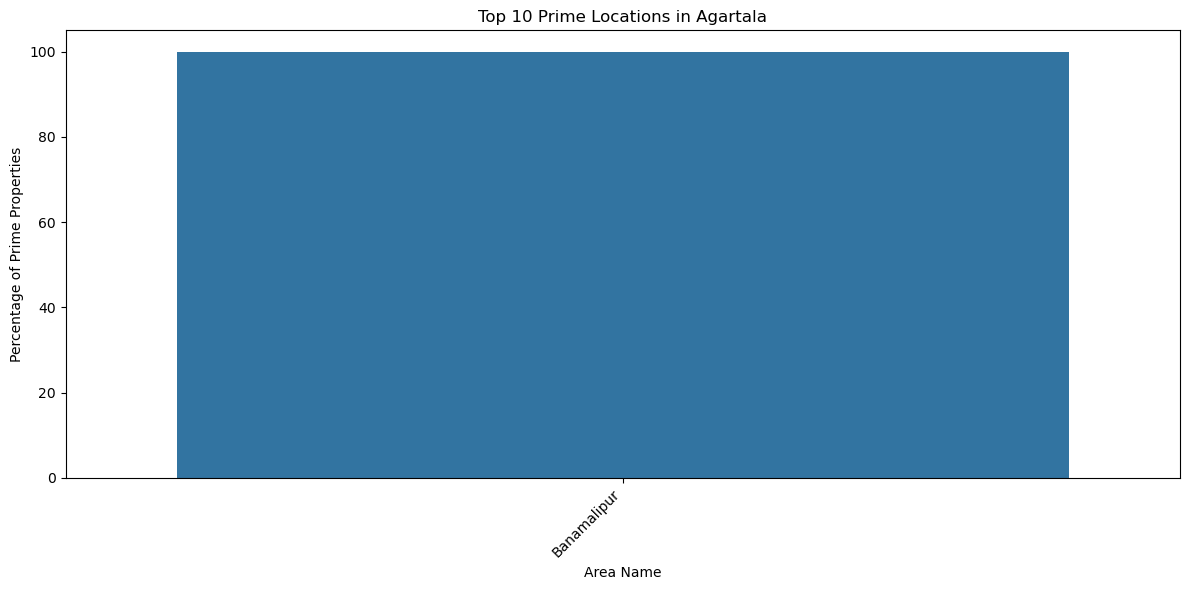

Saved prime_locations_Mumbai.png to q4/prime_locations_Mumbai.png


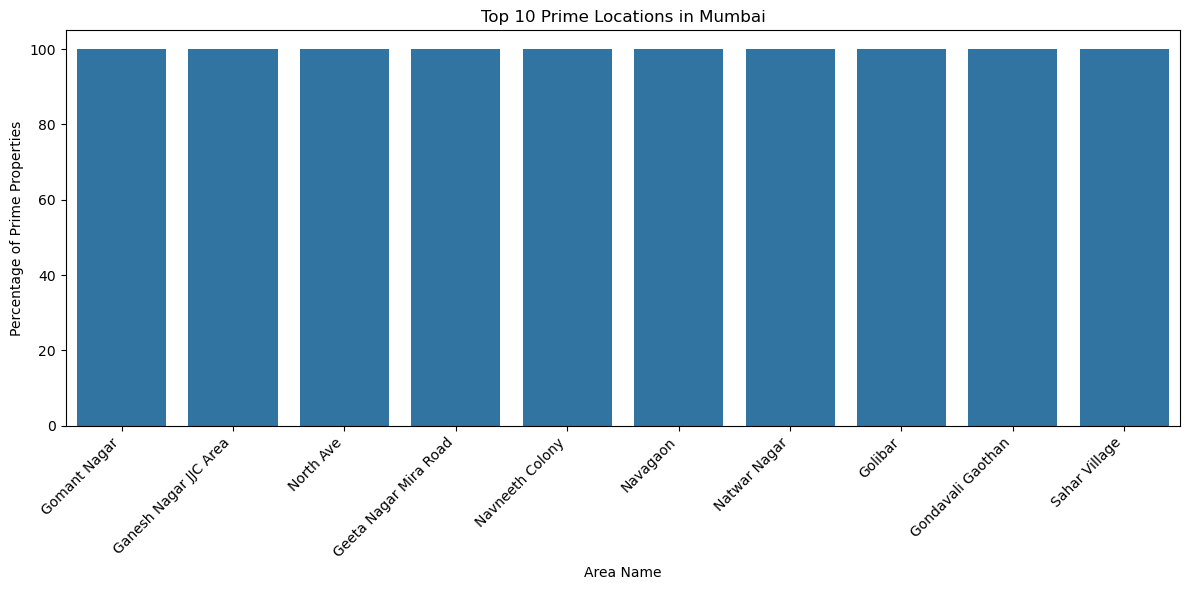

Saved prime_locations_Thane.png to q4/prime_locations_Thane.png


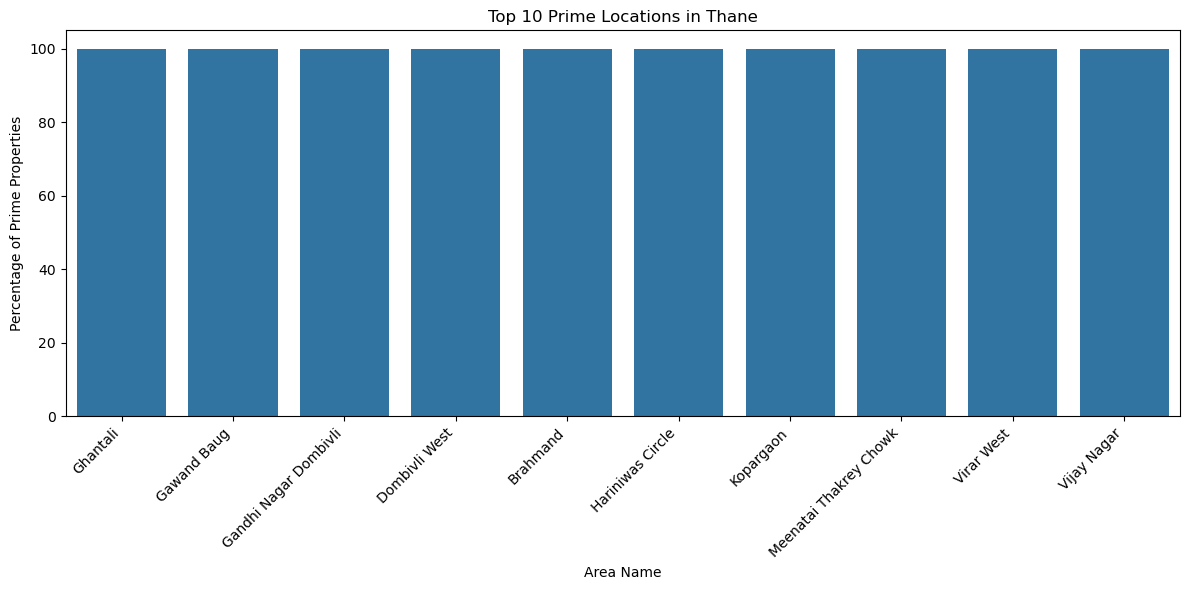

Saved prime_locations_Palghar.png to q4/prime_locations_Palghar.png


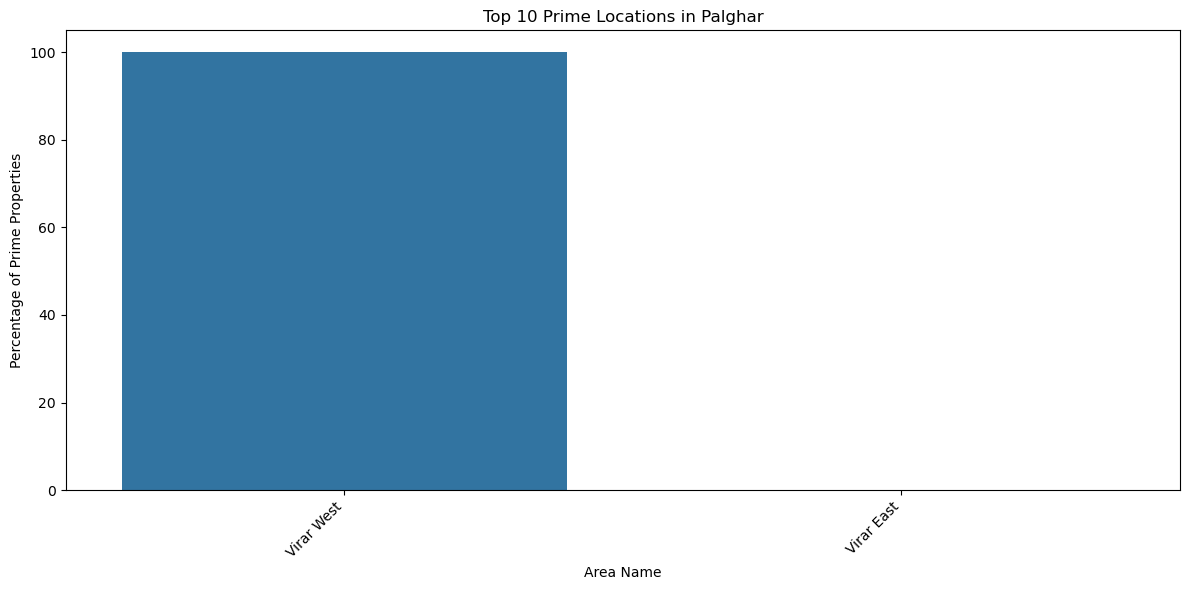

Saved prime_locations_Gurgaon.png to q4/prime_locations_Gurgaon.png


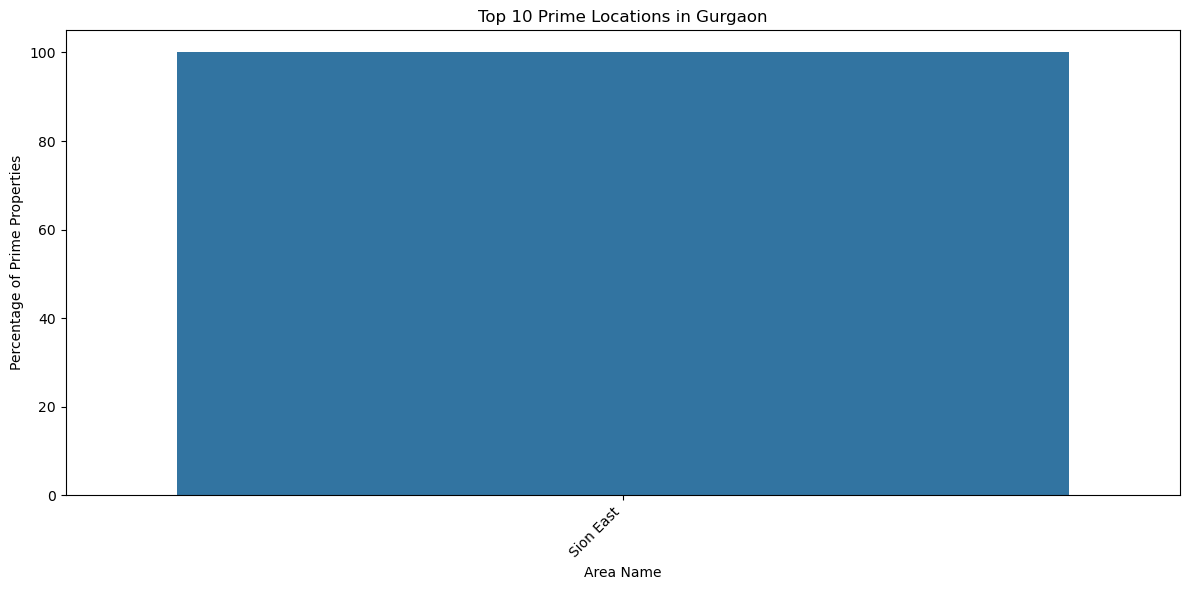

Saved prime_locations_Hyderabad.png to q4/prime_locations_Hyderabad.png


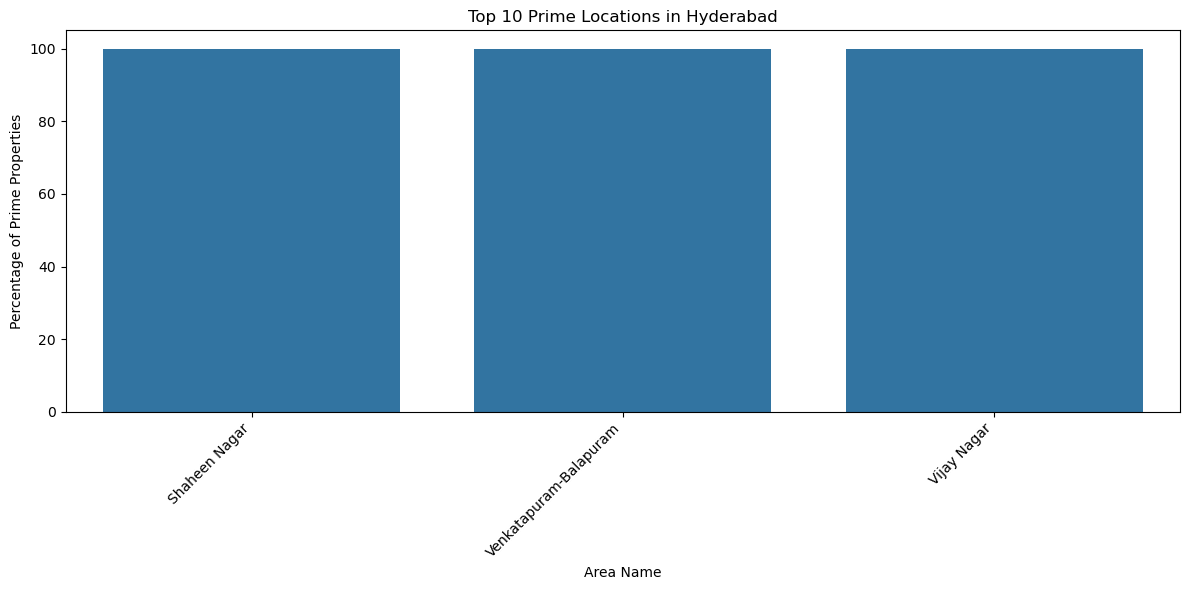

Saved prime_locations_Kalyan.png to q4/prime_locations_Kalyan.png


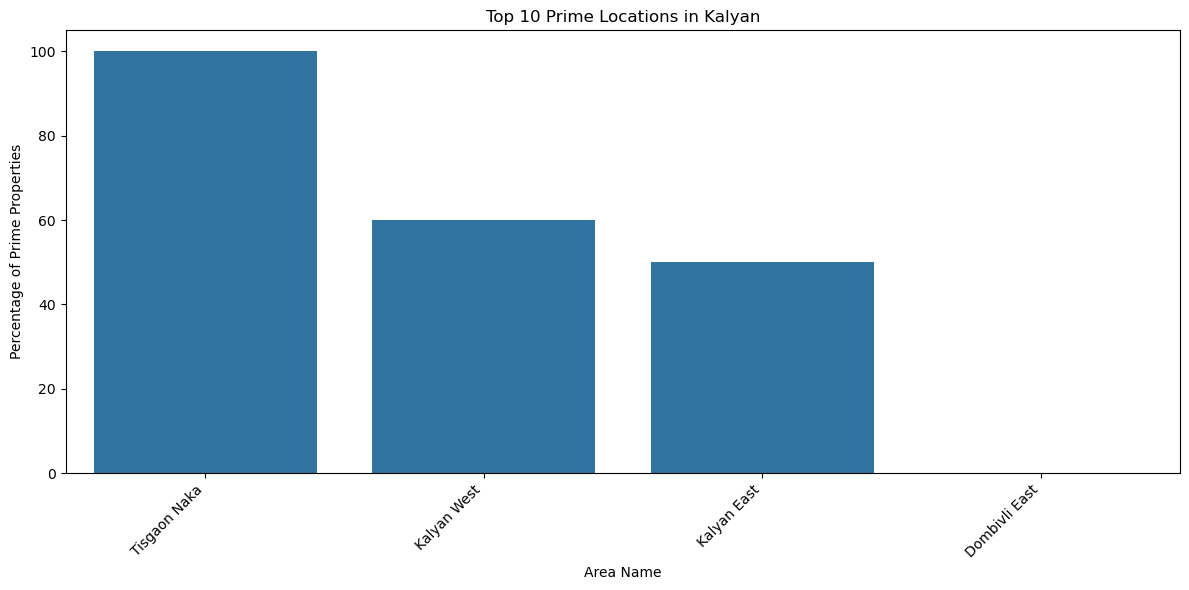

Saved prime_locations_Nagpur.png to q4/prime_locations_Nagpur.png


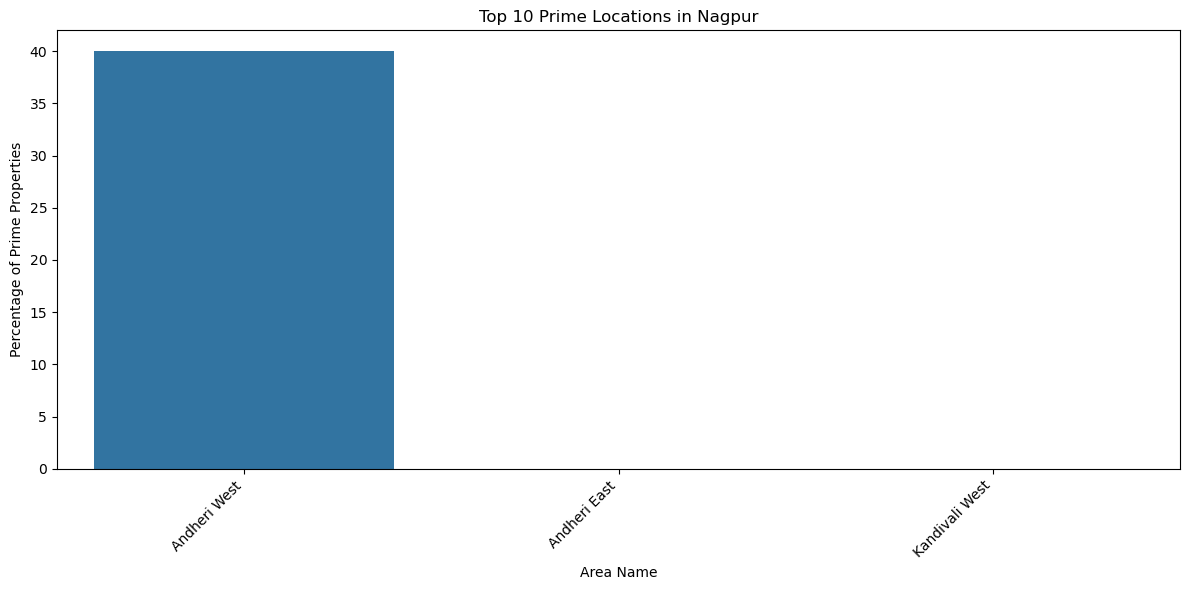

Saved prime_locations_Bhiwandi.png to q4/prime_locations_Bhiwandi.png


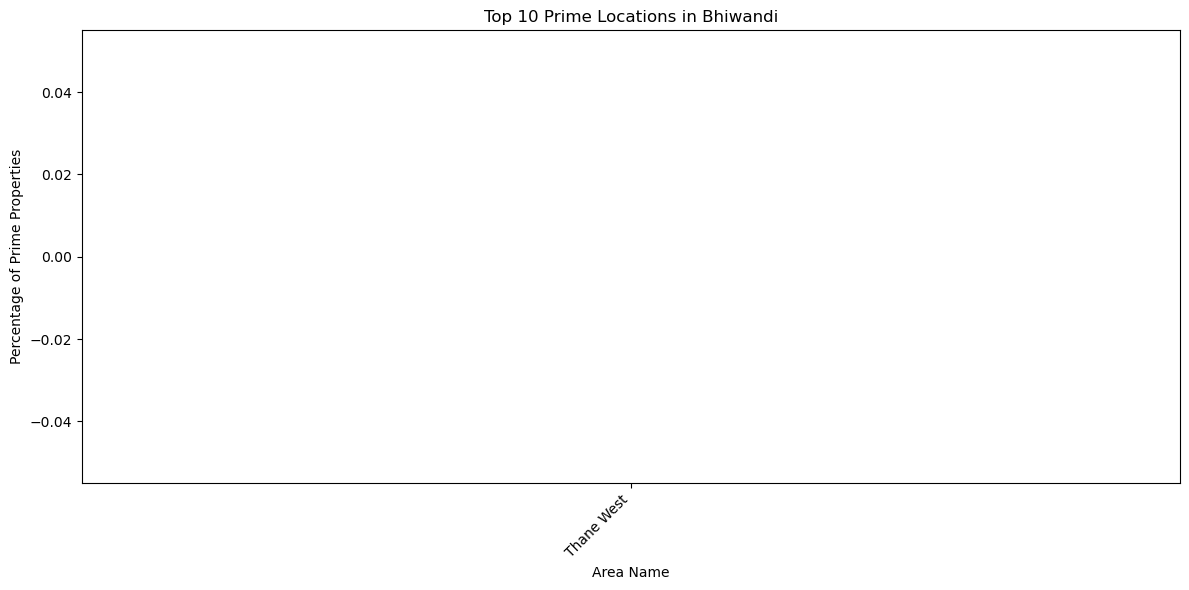

In [8]:
def analyze_prime_locations(df):
    # Ensure 'isPrimeLocationProperty' is either 'Y' or 'N'
    df['isPrimeLocationProperty'] = df['isPrimeLocationProperty'].map({'Y': 'Y', 'N': 'N'})
    
    # Group by City, Area Name, and isPrimeLocationProperty
    location_distribution = df.groupby(['City', 'Area Name', 'isPrimeLocationProperty']).size().unstack(fill_value=0)
    
    # Calculate percentage of prime locations
    location_distribution['Percentage Prime'] = location_distribution['Y'] / (location_distribution['Y'] + location_distribution['N']) * 100
    
    # Sort by percentage of prime locations
    location_distribution = location_distribution.sort_values('Percentage Prime', ascending=False)
    
    return location_distribution

def plot_prime_locations(location_distribution, question_num):
    # Plot top 10 prime locations for each city
    for city in location_distribution.index.get_level_values('City').unique():
        city_data = location_distribution.loc[city].head(10)
        
        plt.figure(figsize=(12, 6))
        sns.barplot(x=city_data.index, y='Percentage Prime', data=city_data)
        plt.title(f'Top 10 Prime Locations in {city}')
        plt.xlabel('Area Name')
        plt.ylabel('Percentage of Prime Properties')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        save_to_question_dir(f'prime_locations_{city}.png', question_num)
        plt.show()

def main_analysis(df, question_num):
    location_distribution = analyze_prime_locations(df)
    print(location_distribution)
    plot_prime_locations(location_distribution, question_num)

main_analysis(data, question_num=4)

## Part 5

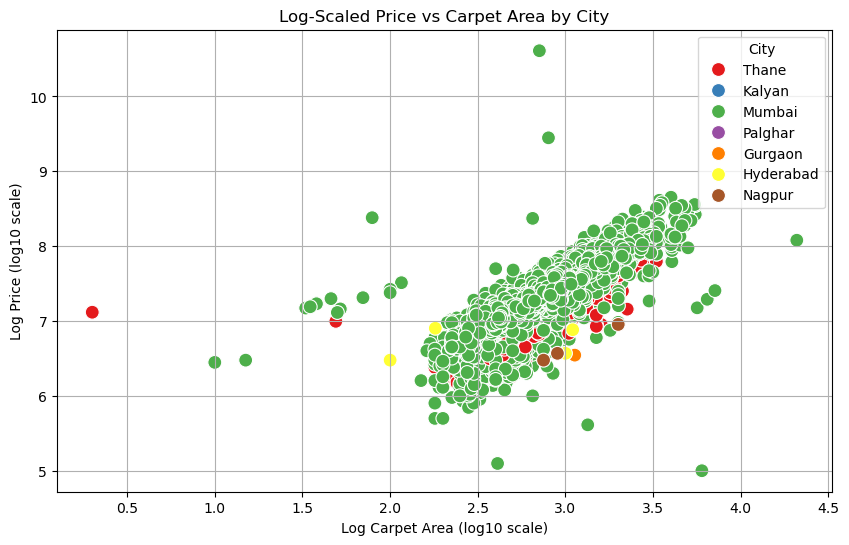

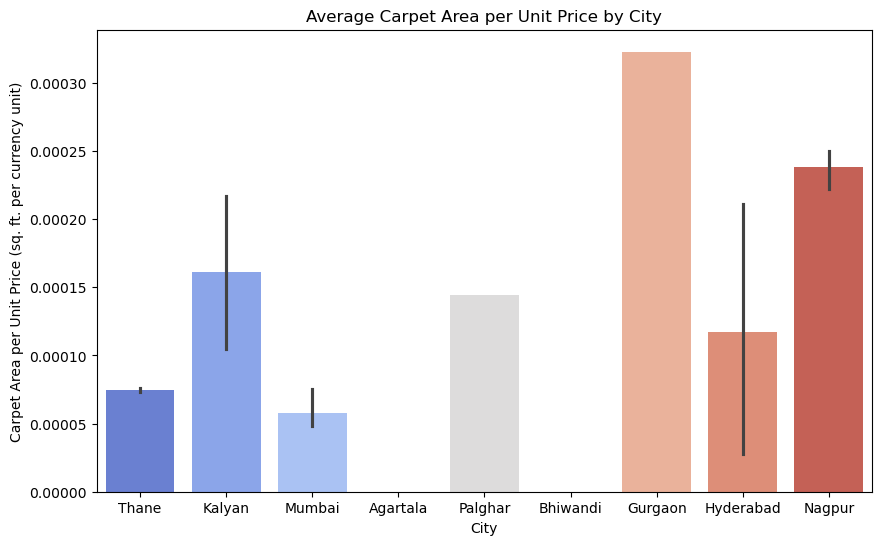

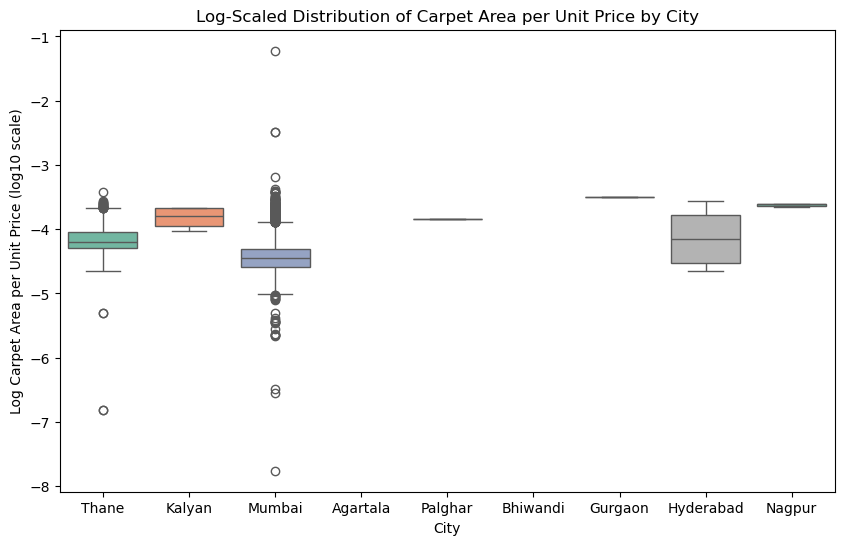

In [9]:
def convert_to_sqft(area, unit):
    """Convert the given area to square feet based on the unit"""
    if pd.isna(area) or pd.isna(unit):
        return None
    conversion_factors = {"Sq-ft": 1, "Sq-m": 10.7639, "Sq-yrd": 9}
    return area * conversion_factors.get(unit, 0)


df = data.copy()

df["Carpet Area (Sq-ft)"] = df.apply(
    lambda row: convert_to_sqft(row["Carpet Area"], row["Carpet Area Unit"]), axis=1
)
carpet_area_df_clean = df.dropna(subset=["Carpet Area (Sq-ft)"])

# PLOT 1

# Apply log scale to Carpet Area and Price
carpet_area_df_clean["Log Carpet Area"] = np.log10(carpet_area_df_clean["Carpet Area"])
carpet_area_df_clean["Log Price"] = np.log10(carpet_area_df_clean["Price"])

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=carpet_area_df_clean,
    x="Log Carpet Area",
    y="Log Price",
    hue="City",
    palette="Set1",
    s=100,
)
plt.title("Log-Scaled Price vs Carpet Area by City")
plt.xlabel("Log Carpet Area (log10 scale)")
plt.ylabel("Log Price (log10 scale)")
plt.grid(True)
plt.show()


# PLOT 2

# adding a new column
df["Area_per_Unit_Price"] = df["Carpet Area"] / df["Price"]

plt.figure(figsize=(10, 6))
sns.barplot(x="City", y="Area_per_Unit_Price", data=df, palette="coolwarm")
plt.title("Average Carpet Area per Unit Price by City")
plt.xlabel("City")
plt.ylabel("Carpet Area per Unit Price (sq. ft. per currency unit)")
plt.show()


# PLOT 3

# Apply log scale to Area_per_Unit_Price
df["Log Area_per_Unit_Price"] = np.log10(df["Area_per_Unit_Price"])

plt.figure(figsize=(10, 6))
sns.boxplot(x="City", y="Log Area_per_Unit_Price", data=df, palette="Set2")
plt.title("Log-Scaled Distribution of Carpet Area per Unit Price by City")
plt.xlabel("City")
plt.ylabel("Log Carpet Area per Unit Price (log10 scale)")
plt.show()


# # PLOT 4

# # Aggregating data to handle duplicates
# df_agg = df.groupby(["City", "Carpet Area"], as_index=False)[
#     "Area_per_Unit_Price"
# ].mean()

# # Pivoting the data for heatmap
# heatmap_data = df_agg.pivot("City", "Carpet Area", "Area_per_Unit_Price")
# plt.figure(figsize=(12, 8))
# sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".2f", linewidths=0.5)
# plt.title("Heatmap of Carpet Area per Unit Price")
# plt.xlabel("Carpet Area (sq. ft.)")
# plt.ylabel("City")
# plt.show()

## Part 7

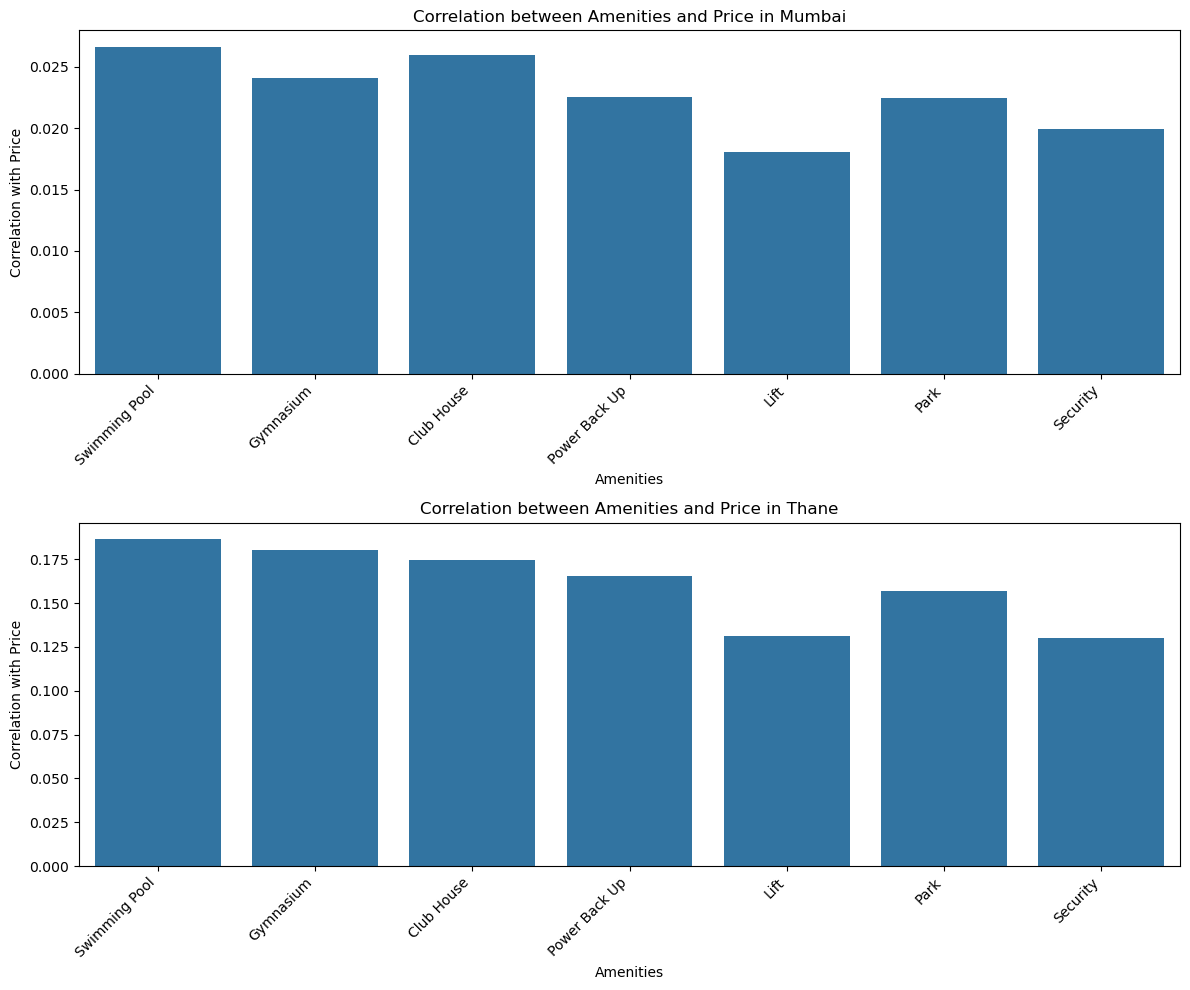

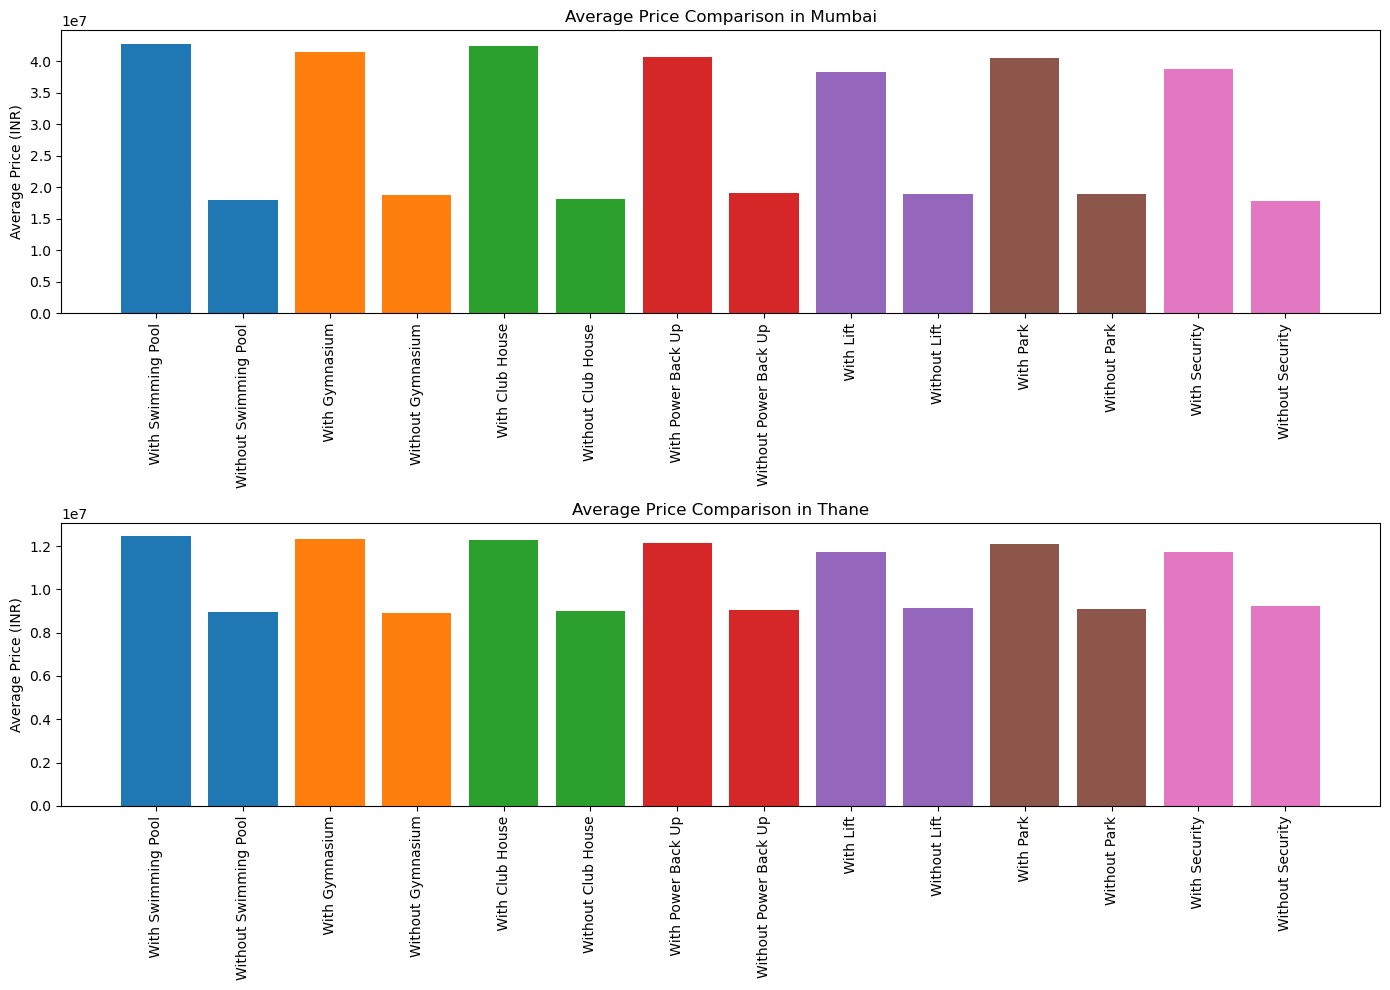

<Figure size 1200x600 with 0 Axes>

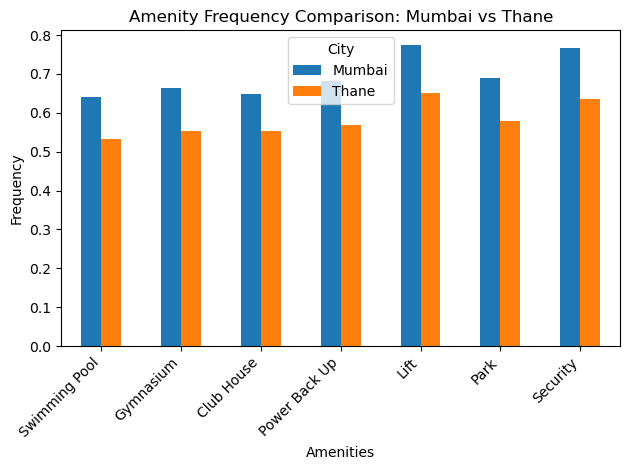

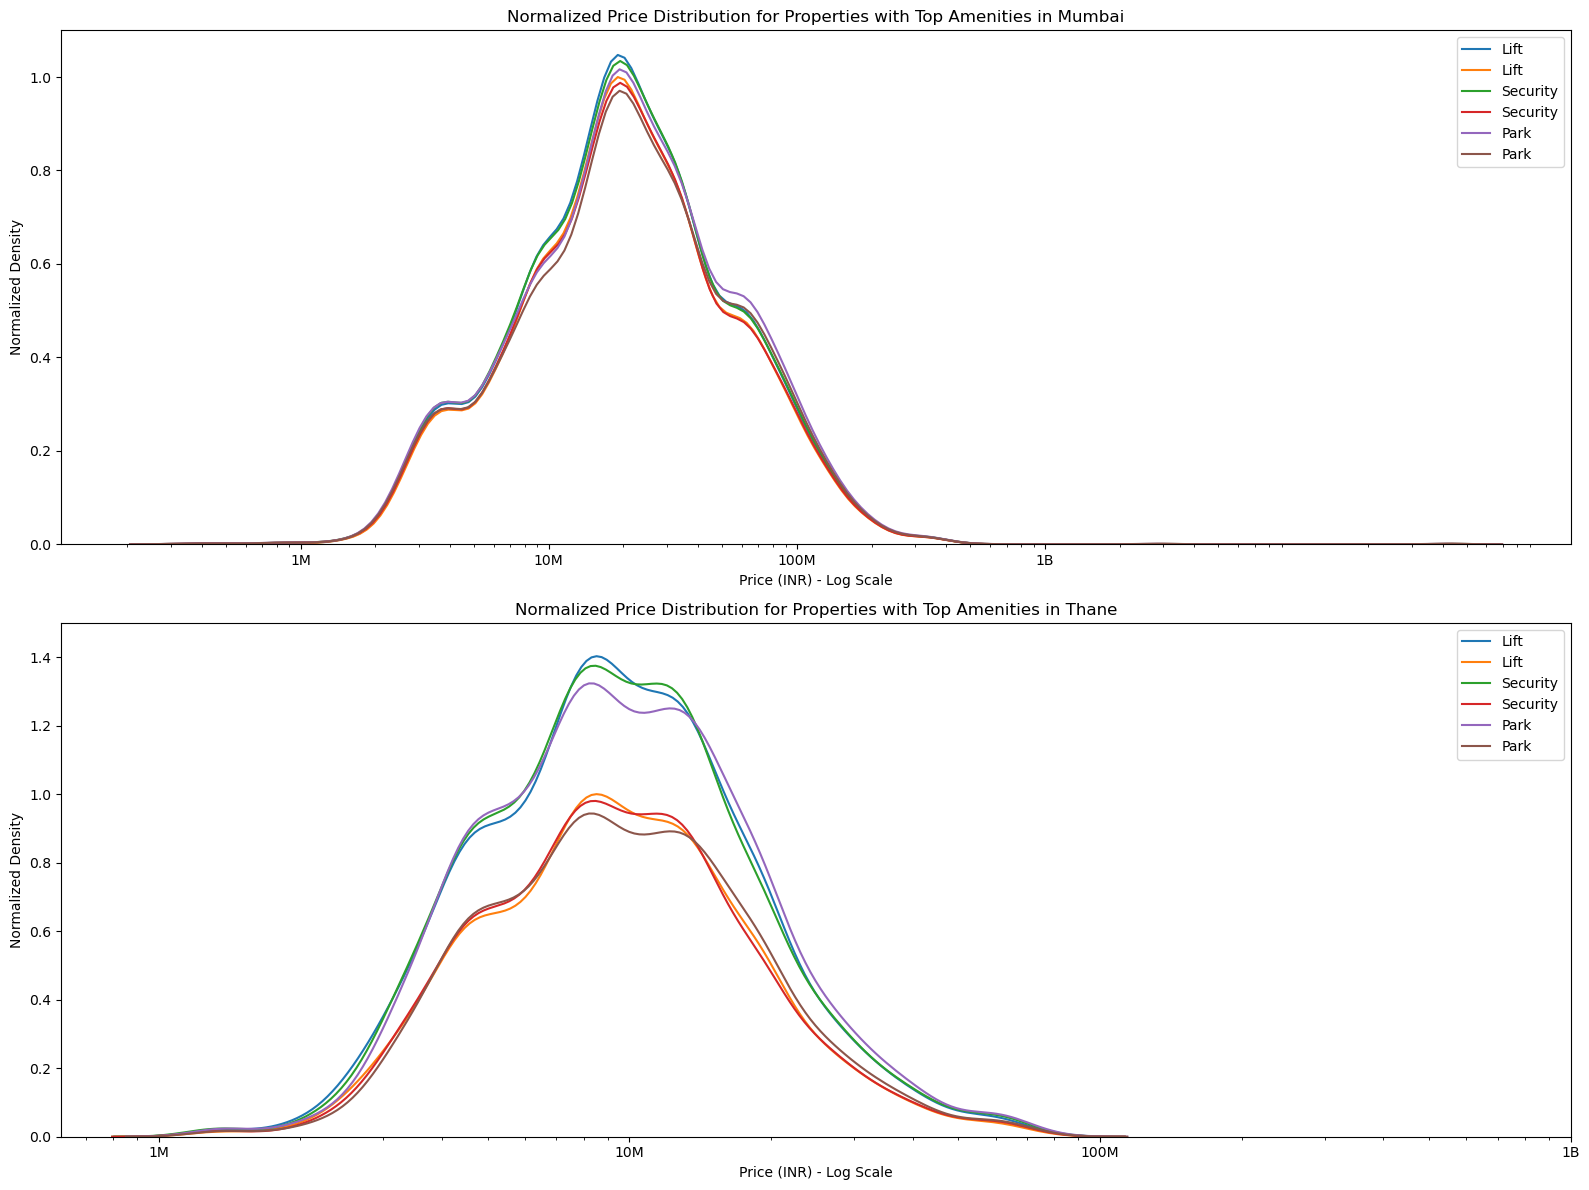

In [22]:
df = data.copy()

def convert_price(price_str):
    if isinstance(price_str, str):
        if 'Lac' in price_str:
            return float(price_str.replace(' Lac', '')) * 100000
        elif 'Cr' in price_str:
            return float(price_str.replace(' Cr', '')) * 10000000
    return pd.np.nan

# pre-processing data
df['Price_Numeric'] = df['Price (English)'].apply(convert_price)
amenities = ['Swimming Pool', 'Gymnasium', 'Club House', 'Power Back Up', 'Lift', 'Park', 'Security']
city_data = data[data['City'].isin(['Mumbai', 'Thane'])]

# PLOT 1
# 1. Correlation between amenities and prices for each city
plt.figure(figsize=(12, 10))
for i, city in enumerate(['Mumbai', 'Thane']):
    city_corr = city_data[city_data['City'] == city][amenities + ['Price_Numeric']].corr()['Price_Numeric'][:-1]
    plt.subplot(2, 1, i+1)
    sns.barplot(x=city_corr.index, y=city_corr.values)
    plt.title(f'Correlation between Amenities and Price in {city}')
    plt.xlabel('Amenities')
    plt.ylabel('Correlation with Price')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
plt.close()


# PLOT 2
plt.figure(figsize=(14, 10))
for i, city in enumerate(['Mumbai', 'Thane']):
    city_df = city_data[city_data['City'] == city]
    plt.subplot(2, 1, i+1)
    for amenity in amenities:
        with_amenity = city_df[city_df[amenity] == 1]['Price_Numeric'].mean()
        without_amenity = city_df[city_df[amenity] == 0]['Price_Numeric'].mean()
        plt.bar([f' With {amenity}', f'Without {amenity}'], [with_amenity, without_amenity])
    plt.title(f'Average Price Comparison in {city}')
    plt.ylabel('Average Price (INR)')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
plt.close()


# PLOT 3
amenity_freq = city_data.groupby('City')[amenities].mean()
plt.figure(figsize=(12, 6))
amenity_freq.T.plot(kind='bar')
plt.title('Amenity Frequency Comparison: Mumbai vs Thane')
plt.xlabel('Amenities')
plt.ylabel('Frequency')
plt.legend(title='City')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
plt.close()


# PLOT 4
top_amenities = amenity_freq.mean().nlargest(3).index
plt.figure(figsize=(16, 12))

for i, city in enumerate(['Mumbai', 'Thane']):
    city_df = city_data[city_data['City'] == city]
    plt.subplot(2, 1, i+1)
    
    max_density = 0
    for amenity in top_amenities:
        prices = city_df[city_df[amenity] == 1]['Price_Numeric']
        
        # Use only prices > 0 for log scale
        prices = prices[prices > 0]
        
        # Calculate KDE
        kde = sns.kdeplot(data=prices, log_scale=True, label=amenity)
        
        # Get the line data
        line = kde.lines[-1]
        x, y = line.get_data()
        
        # Update max_density
        max_density = max(max_density, np.max(y))
        
        # Normalize y values
        y = y / max_density
        
        # Replot with normalized y values
        plt.plot(x, y, label=amenity)
    
    plt.title(f'Normalized Price Distribution for Properties with Top Amenities in {city}')
    plt.xlabel('Price (INR) - Log Scale')
    plt.ylabel('Normalized Density')
    plt.legend()
    
    # Set x-axis to log scale with custom tick labels
    plt.xscale('log')
    plt.xticks([1e6, 1e7, 1e8, 1e9], ['1M', '10M', '100M', '1B'])
    
    # Set y-axis limits
    if city == 'Mumbai':
        plt.ylim(0, 1.1)
    else:  # Thane
        plt.ylim(0, 1.5)  # Increased y-axis limit for Thane

plt.tight_layout()
plt.show()
plt.close()

## Part 9

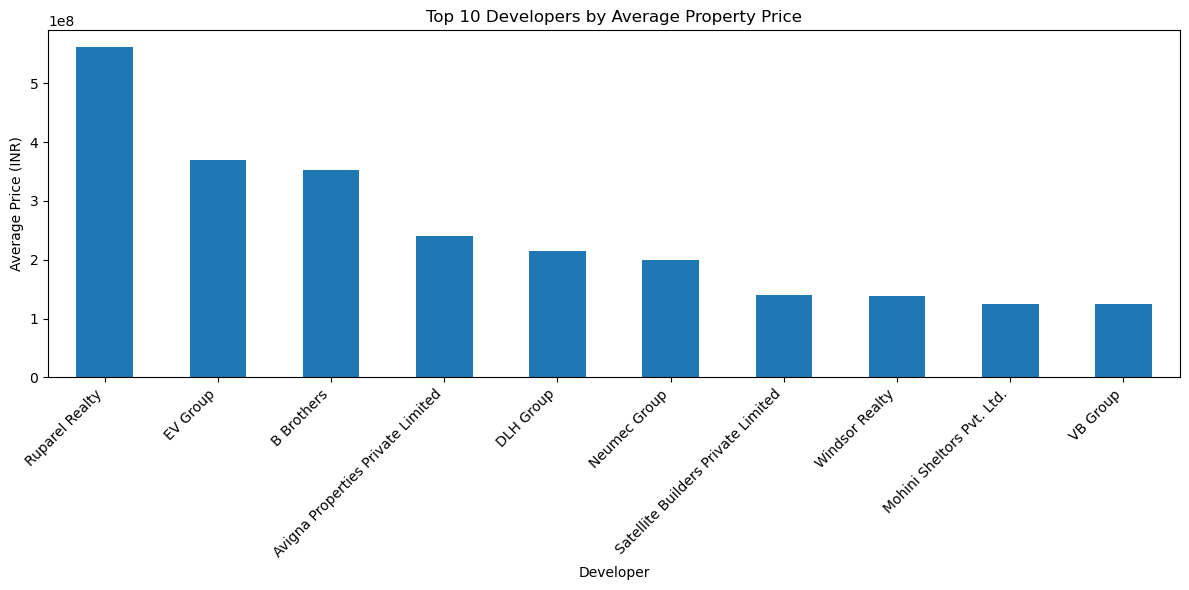

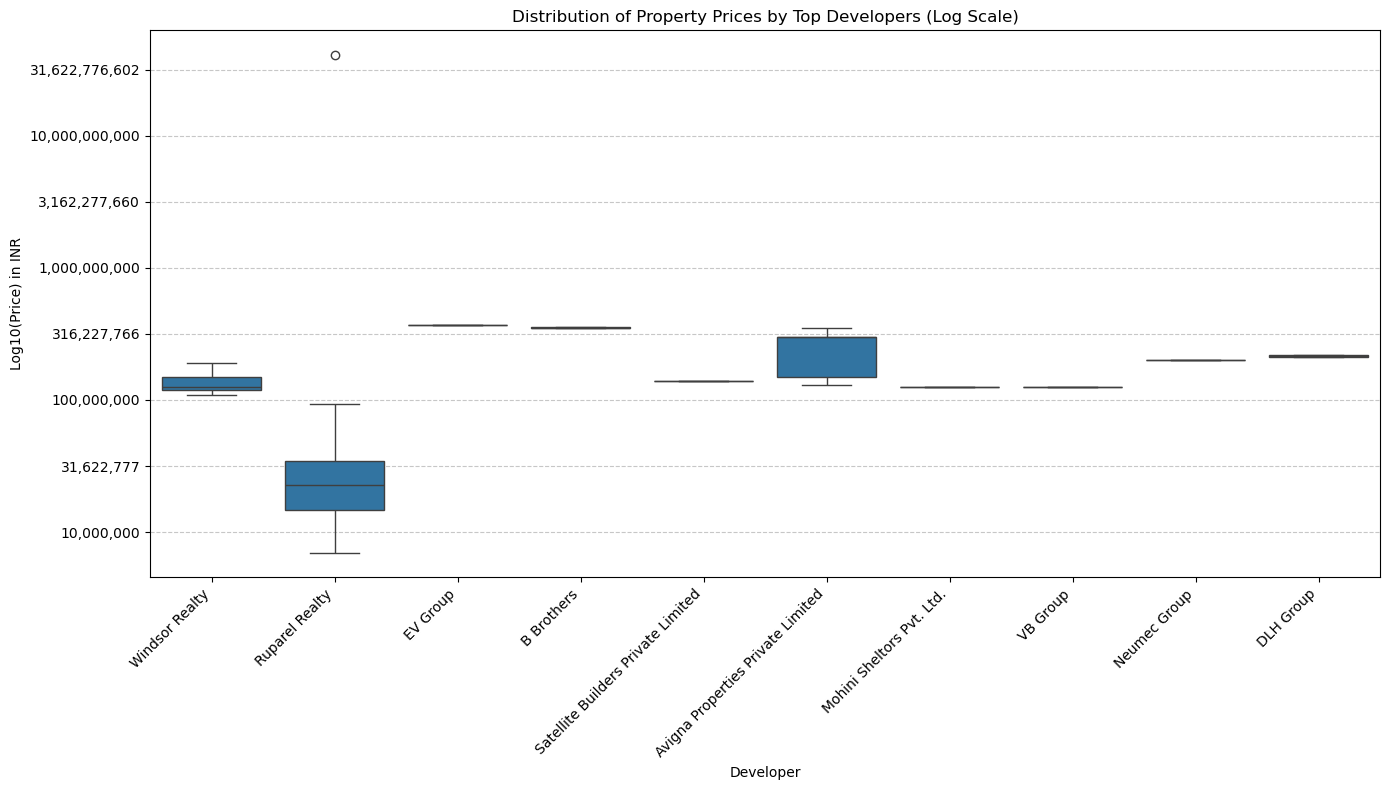

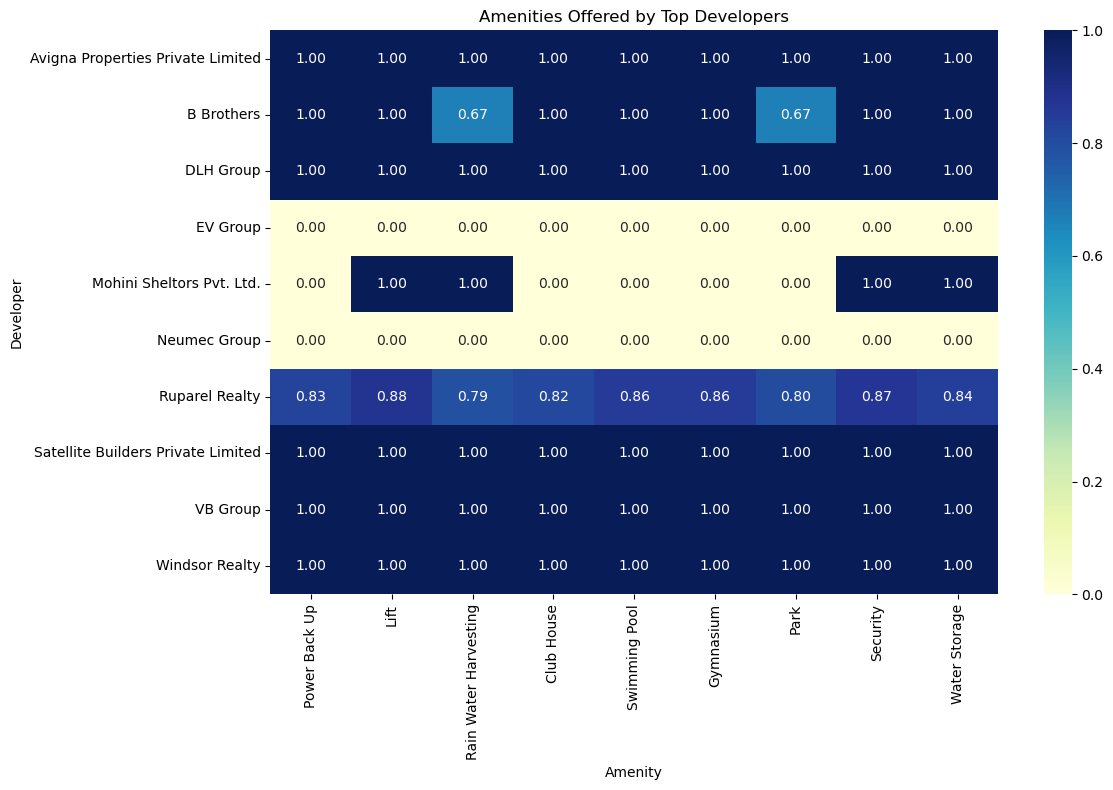

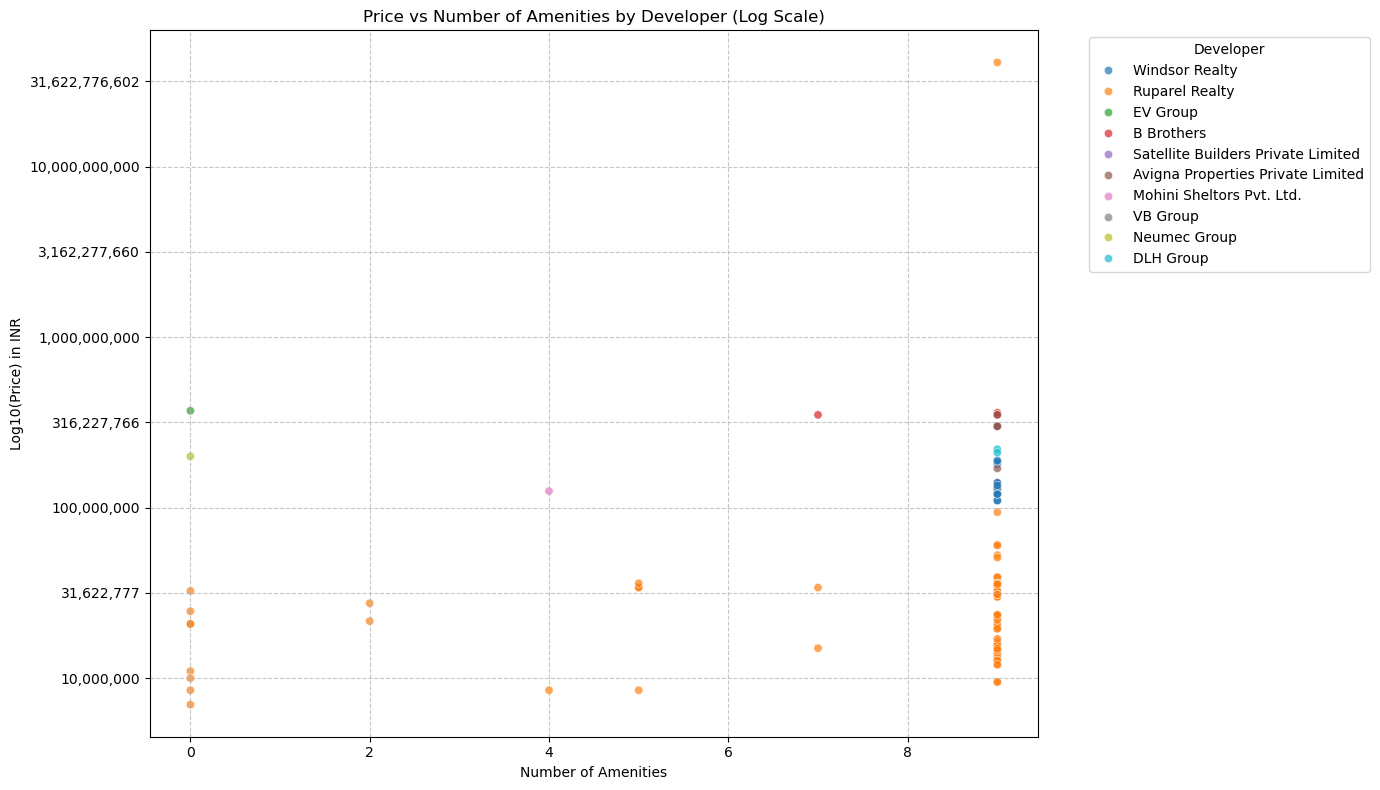

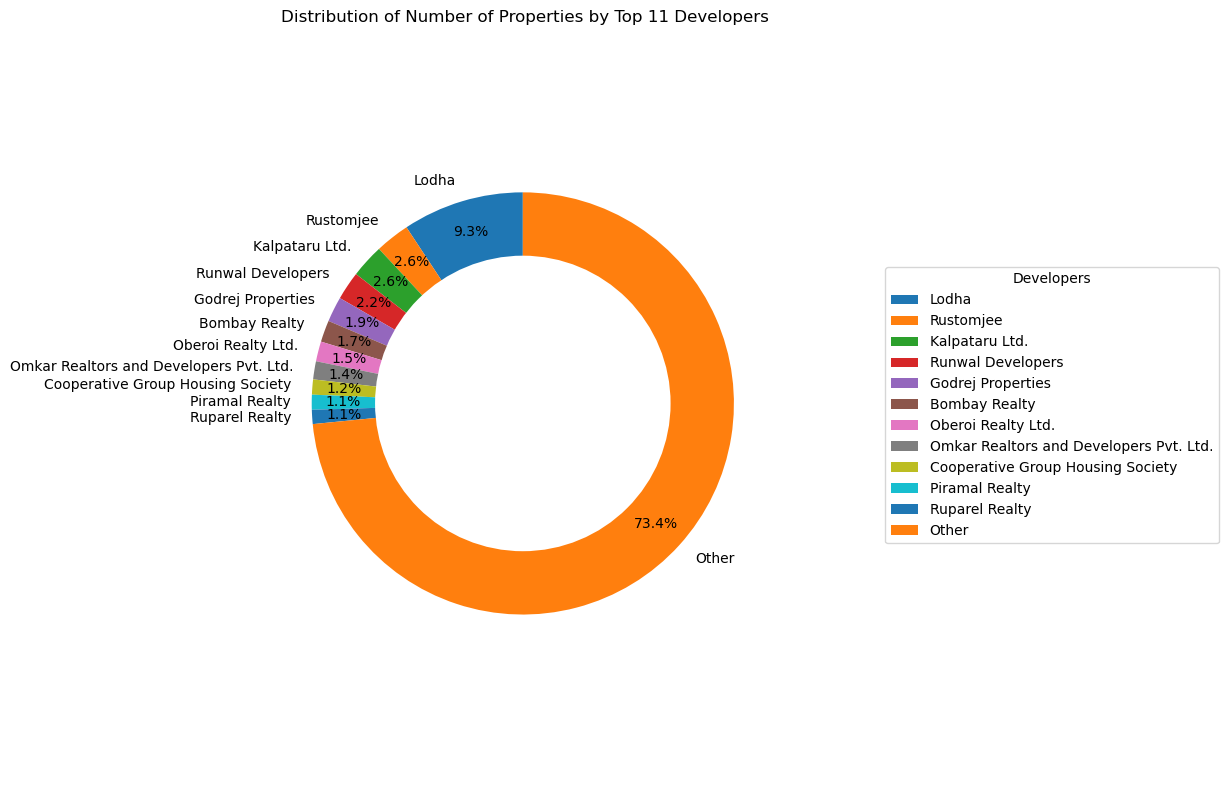

In [11]:
# removing outliers
def remove_outliers(df, columns):
    """Remove outliers using the IQR method"""
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        df = df[(df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 * IQR)]
    return df


# Convert Price to numeric, removing 'Lac' and 'Cr'
def convert_price(price_str):
    if isinstance(price_str, str):
        if "Lac" in price_str:
            return float(price_str.replace(" Lac", "")) * 100000
        elif "Cr" in price_str:
            return float(price_str.replace(" Cr", "")) * 10000000
    return pd.np.nan


data["Price_Numeric"] = data["Price (English)"].apply(convert_price)

# Count amenities
amenity_columns = [
    "Power Back Up",
    "Lift",
    "Rain Water Harvesting",
    "Club House",
    "Swimming Pool",
    "Gymnasium",
    "Park",
    "Parking",
    "Security",
    "Water Storage",
]
data["Amenity_Count"] = data[amenity_columns].sum(axis=1)

# Filter out rows with missing developer information
data_filtered = data[data["Developer"].notna() & (data["Developer"] != "NA")]

# 1. Top developers by average property price
top_developers = (
    data_filtered.groupby("Developer")["Price_Numeric"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(12, 6))
top_developers.plot(kind="bar")
plt.title("Top 10 Developers by Average Property Price")
plt.xlabel("Developer")
plt.ylabel("Average Price (INR)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
# plt.savefig("top_developers_by_price.png")
plt.close()


# 2. Distribution of property prices for each developer (log-scaled)
plt.figure(figsize=(14, 8))

# Apply log transformation to price data
data_filtered["Log_Price"] = np.log10(data_filtered["Price_Numeric"])

# Create the box plot with log-scaled prices
sns.boxplot(
    x="Developer",
    y="Log_Price",
    data=data_filtered[data_filtered["Developer"].isin(top_developers.index)],
)

plt.title("Distribution of Property Prices by Top Developers (Log Scale)")
plt.xlabel("Developer")
plt.ylabel("Log10(Price) in INR")
plt.xticks(rotation=45, ha="right")

# Customize y-axis ticks to show original price values
yticks = plt.gca().get_yticks()
yticklabels = [f"{10**y:,.0f}" for y in yticks]
plt.gca().set_yticklabels(yticklabels)

# Add a grid for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()
# plt.savefig("price_distribution_by_developer_log_scale.png")
plt.close()


# 3. Amenities offered by top developers
amenities_by_developer = (
    data_filtered[data_filtered["Developer"].isin(top_developers.index)]
    .groupby("Developer")[amenity_columns]
    .mean()
)

plt.figure(figsize=(12, 8))
sns.heatmap(amenities_by_developer, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Amenities Offered by Top Developers")
plt.ylabel("Developer")
plt.xlabel("Amenity")
plt.tight_layout()
plt.show()
# plt.savefig("amenities_by_developer.png")
plt.close()


# 4. Relationship between price and number of amenities for each developer (log-scaled price)
plt.figure(figsize=(14, 8))

# Apply log transformation to price data
data_filtered["Log_Price"] = np.log10(data_filtered["Price_Numeric"])

sns.scatterplot(
    x="Amenity_Count",
    y="Log_Price",
    hue="Developer",
    data=data_filtered[data_filtered["Developer"].isin(top_developers.index)],
    alpha=0.7,  # Add some transparency to the points
)

plt.title("Price vs Number of Amenities by Developer (Log Scale)")
plt.xlabel("Number of Amenities")
plt.ylabel("Log10(Price) in INR")

# Customize y-axis ticks to show original price values
yticks = plt.gca().get_yticks()
yticklabels = [f"{10**y:,.0f}" for y in yticks]
plt.gca().set_yticklabels(yticklabels)

# Add a grid for better readability
plt.grid(linestyle="--", alpha=0.7)

# Adjust legend
plt.legend(title="Developer", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()
# plt.savefig("price_vs_amenities_by_developer_log_scale.png")
plt.close()


# 5. Distribution of properties by developer (pie chart)
plt.figure(figsize=(12, 8))

# Count properties for each developer
developer_counts = data_filtered["Developer"].value_counts()

# Select top developers (e.g., top 10) to keep the chart readable
top_n = 11
other_count = developer_counts.iloc[top_n:].sum()
top_developers_counts = developer_counts.iloc[:top_n]
top_developers_counts["Other"] = other_count

# Calculate percentages
total_properties = top_developers_counts.sum()
percentages = top_developers_counts / total_properties * 100

# Create pie chart
plt.pie(
    percentages,
    labels=percentages.index,
    autopct="%1.1f%%",
    startangle=90,
    pctdistance=0.85,
)

# Add a circle at the center to create a donut chart (optional)
center_circle = plt.Circle((0, 0), 0.70, fc="white")
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.title(f"Distribution of Number of Properties by Top {top_n} Developers")
plt.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle

# Add legend
plt.legend(title="Developers", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()
# plt.savefig("property_distribution_by_developer_pie.png")
plt.close()